In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
df_listings = pd.read_csv(r"C:\Users\ethanwilliams\Desktop\airbnb_capstone\airbnb-data\listings.csv ")
df_listings_details = pd.read_csv(r"C:\Users\ethanwilliams\Desktop\airbnb_capstone\airbnb-data\listings_details.csv")
reviews = pd.read_csv(r"C:\Users\ethanwilliams\Desktop\airbnb_capstone\airbnb-data\reviews.csv")
reviews_details = pd.read_csv(r"C:\Users\ethanwilliams\Desktop\airbnb_capstone\airbnb-data\reviews_details.csv")

In [6]:
df_listings.head()

id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1   3209                  Quiet apt near center, great view     3806   
2  20168         100%Centre-Studio 1 Private Floor/Bathroom    59484   
3  25428                Lovely apt in City Centre (Jordaan)    56142   
4  27886  Romantic, stylish B&B houseboat in canal district    97647   

  host_name  neighbourhood_group                           neighbourhood  \
0    Daniel                  NaN  Oostelijk Havengebied - Indische Buurt   
1   Maartje                  NaN                              Westerpark   
2      Alex                  NaN                            Centrum-Oost   
3      Joan                  NaN                            Centrum-West   
4      Flip                  NaN                            Centrum-West   

    latitude  longitude        room_type  price  minimum_nights  \
0  52.365755   4.941419     Private room     59               3   
1  52.390225   4.873924  Entire home/apt    160               4   
2  52.365087   4.893541  Entire home/apt     80               1   
3  52.373114   4.883668  Entire home/apt    125              14   
4  52.386727   4.892078     Private room    150               2   

   number_of_reviews last_review  reviews_per_month  \
0                248  2018-11-28               2.10   
1                 42  2018-08-29               1.03   
2                233  2018-11-30               2.18   
3                  1  2018-01-21               0.09   
4                171  2018-11-25               2.03   

   calculated_host_listings_count  availability_365  
0                               1                44  
1                               1                47  
2                               2               198  
3                               2               141  
4                               1               199

In [52]:
df_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df_listings_details.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20181206172549   2018-12-06   
1   3209   https://www.airbnb.com/rooms/3209  20181206172549   2018-12-06   
2  20168  https://www.airbnb.com/rooms/20168  20181206172549   2018-12-06   
3  25428  https://www.airbnb.com/rooms/25428  20181206172549   2018-12-06   
4  27886  https://www.airbnb.com/rooms/27886  20181206172549   2018-12-06   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1                  Quiet apt near center, great view   
2         100%Centre-Studio 1 Private Floor/Bathroom   
3                Lovely apt in City Centre (Jordaan)   
4  Romantic, stylish B&B houseboat in canal district   

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  You will love our spacious (90 m2) bright apar...   
2  Cozy studio on your own private floor, 100% in...   
3                                                NaN   
4  Stylish and romantic houseboat on fantastic hi...   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  Our apartment has lots of light, a balcony and...   
2  For those who like all facets of city life. In...   
3  This nicely furnished, newly renovated apt  is...   
4  For a romantic couple: A beautifully restored ...   

                                         description experiences_offered  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none   
1  You will love our spacious (90 m2) bright apar...                none   
2  Cozy studio on your own private floor, 100% in...                none   
3  This nicely furnished, newly renovated apt  is...                none   
4  Stylish and romantic houseboat on fantastic hi...                none   

                               neighborhood_overview  ... requires_license  \
0  Indische Buurt ("Indies Neighborhood") is a ne...  ...                f   
1  Welcome to the Spaarndammerbuurt! From the beg...  ...                f   
2  Located just in between famous central canals....  ...                f   
3                                                NaN  ...                f   
4         Central, quiet, safe, clean and beautiful.  ...                f   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN        {Amsterdam}                t                        f   
1     NaN        {Amsterdam}                f                        f   
2     NaN        {Amsterdam}                f                        f   
3     NaN        {Amsterdam}                f                        f   
4     NaN        {Amsterdam}                t                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              f   
1                     moderate                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              f   
4  strict_14_with_grace_period                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               1   
1                                f                               1   
2                                f                               2   
3                                f                               2   
4                                f                               1   

   reviews_per_month  
0               2.10  
1               1.03  
2               2.18  
3               0.09  
4               2.03  

[5 rows x 96 columns]

In [53]:
df_listings_details.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Purpose:
## Predicting airbnb prices:

Hypothetically I would like to list my house on airbnb however I am unsure at what fair value I should list my house at. I am curious as to what features of a home is more likely to not only allow the price to be listed at a higher price, but of that which high price houses tend to rent out most often. For this type of analysis I will need to injest to datasets.

1. Listings
2. Listings Details.


In [87]:
df_listings_details.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 96, dtype: object

In [88]:
df_listings_details.shape[1]

96

In [89]:
cat_cols = df_listings_details.select_dtypes(include=['object'])
cat_cols.shape[1]

62

In [25]:
num_cols = df_listings.select_dtypes(include=['int64','float64'])
num_cols.shape[1]

11

In [90]:
np.sum(np.sum(df_listings_details.isnull()) == 0)

42

Looks like I have 42 of 96 Columns without any null values. This is good could be ok depending on what features have the majority of missing values. 

In [174]:
pd.set_option('display.max_rows', None)
np.sum(df_listings_details.isnull()/df_listings_details.shape[0])

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.001897
summary                             0.025961
space                               0.272142
description                         0.006191
experiences_offered                 0.000000
neighborhood_overview               0.338143
notes                               0.549126
transit                             0.319271
access                              0.389566
interaction                         0.402197
house_rules                         0.372391
thumbnail_url                       1.000000
medium_url                          1.000000
picture_url                         0.000000
xl_picture_url                      1.000000
host_id                             0.000000
host_url                            0.000000
host_name                           0.000200
host_since

In [157]:
np.sum(np.sum(df_listings_details.isnull())/df_listings_details.shape[0] > .50)

10

In [189]:
np.sum(np.sum(df_listings_details.isnull())/df_listings_details.shape[0] > .75) 

9

In [120]:
np.sum(np.sum(df_listings_details.isnull())/df_listings_details.shape[0] > .99) 

6

In [190]:
df_listings_details[["reviews_per_month","last_review","id"]]

reviews_per_month last_review        id
0                   2.10  2018-11-28      2818
1                   1.03  2018-08-29      3209
2                   2.18  2018-11-30     20168
3                   0.09  2018-01-21     25428
4                   2.03  2018-11-25     27886
5                   4.16  2018-11-19     28658
6                   2.13  2018-12-03     28871
7                   4.07  2018-12-05     29051
8                   0.36  2017-10-16     31080
9                   0.78  2018-10-07     41125
10                  4.24  2018-11-24     42970
11                  0.62  2018-02-18     43980
12                  1.74  2018-10-01     44129
13                  0.31  2018-11-18     44391
14                  0.79  2018-10-21     45246
15                  0.03  2018-01-03     46386
16                  1.67  2018-11-03     47061
17                  1.82  2018-12-04     48076
18                  1.06  2018-11-18     49790
19                  0.21  2018-08-24     50515
20                  1.22  2018-11-18     50518
21                  2.21  2018-11-21     50523
22                  1.62  2018-08-25     50570
23                  0.82  2018-11-25     52490
24                  3.40  2018-12-02     53067
25                  2.80  2018-12-02     53671
26                  2.40  2018-06-22     53692
27                  1.26  2018-11-25     55256
28                  0.07  2016-10-19     55703
29                  0.54  2018-10-15     55709
30                  1.53  2018-06-08     55807
31                  0.91  2018-08-13     55868
32                  0.01  2012-07-27     56879
33                  4.29  2017-09-30     57408
34                  1.48  2018-06-18     57978
35                  1.05  2018-10-29     58211
36                  0.22  2018-10-21     62015
37                   NaN         NaN     62801
38                  1.43  2018-07-30     64736
39                  0.28  2018-08-04     64769
40                  0.91  2018-01-19     65230
41                  0.14  2018-07-25     67841
42                  6.10  2018-11-29     68290
43                  5.56  2018-11-25     68873
44                  1.41  2018-12-03     69042
45                  0.62  2018-07-30     73208
46                  1.22  2018-08-05     73917
47                  0.11  2011-11-09     74367
48                  1.93  2018-11-30     75382
49                  2.69  2018-11-26     75444
50                  1.31  2018-12-02     76668
51                  1.92  2018-12-03     80634
52                  1.68  2018-12-03     80635
53                  7.64  2018-12-02     82482
54                  1.24  2018-07-26     82748
55                  6.96  2018-12-04     83498
56                  0.75  2018-11-18     84057
57                  0.32  2018-10-15     91535
58                  2.57  2018-12-02     96048
59                  1.56  2018-11-18     97221
60                  0.50  2018-09-25     97476
61                  0.33  2018-11-04    107195
62                  0.80  2018-10-25    107972
63                  0.15  2018-05-30    108890
64                  1.26  2017-07-12    115795
65                  3.80  2018-11-16    118097
66                  5.42  2018-12-03    118117
67                  1.55  2018-05-27    120872
68                  0.43  2016-11-14    125425
69                  0.33  2017-10-15    130390
70                  1.03  2018-10-28    137026
71                  0.90  2018-10-15    141708
72                  0.64  2018-10-21    147270
73                  1.91  2018-11-12    148132
74                  1.62  2018-06-24    150634
75                  6.41  2018-11-20    152280
76                  0.31  2018-11-25    156815
77                  0.64  2018-09-16    162467
78                  0.72  2018-05-23    165833
79                  2.33  2018-12-03    168769
80                  0.20  2018-08-29    169356
81                  0.55  2018-11-13    170223
82                  1.13  2017-12-21    171054
83                  0.50  2018-04-03    171631
84          

In [50]:
reviews.head()

listing_id        date
0        2818  2009-03-30
1        2818  2009-04-24
2        2818  2009-05-03
3        2818  2009-05-18
4        2818  2009-05-25

In [57]:
reviews_details.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        2818  1191  2009-03-30        10952           Lam   
1        2818  1771  2009-04-24        12798         Alice   
2        2818  1989  2009-05-03        11869       Natalja   
3        2818  2797  2009-05-18        14064       Enrique   
4        2818  3151  2009-05-25        17977       Sherwin   

                                            comments  
0  Daniel is really cool. The place was nice and ...  
1  Daniel is the most amazing host! His place is ...  
2  We had such a great time in Amsterdam. Daniel ...  
3  Very professional operation. Room is very clea...  
4  Daniel is highly recommended.  He provided all...

In [55]:
# lets take a look id 30576148 to see if there are any reviews
reviews[reviews['listing_id'] == 30576148]



Empty DataFrame
Columns: [listing_id, date]
Index: []

In [61]:
reviews_details[reviews_details['listing_id'] == 30576148]

Empty DataFrame
Columns: [listing_id, id, date, reviewer_id, reviewer_name, comments]
Index: []

Looks like all the nan values in this case are ones without any reviews, this means we will just replace all nan values with 0. 

In [192]:
df_listings_details['last_review'] = df_listings_details['last_review'].fillna(0)
df_listings_details['reviews_per_month'] = df_listings_details['reviews_per_month'].fillna(0)


In [207]:
df_listings_details['price'] = df_listings_details.price.astype("int")
df_listings_details['price'] = df_listings_details.price.astype("int")

ValueError: invalid literal for int() with base 10: '$59.00'

In [206]:
df_listings_details.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20181206172549   2018-12-06   
1   3209   https://www.airbnb.com/rooms/3209  20181206172549   2018-12-06   
2  20168  https://www.airbnb.com/rooms/20168  20181206172549   2018-12-06   
3  25428  https://www.airbnb.com/rooms/25428  20181206172549   2018-12-06   
4  27886  https://www.airbnb.com/rooms/27886  20181206172549   2018-12-06   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1                  Quiet apt near center, great view   
2         100%Centre-Studio 1 Private Floor/Bathroom   
3                Lovely apt in City Centre (Jordaan)   
4  Romantic, stylish B&B houseboat in canal district   

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  You will love our spacious (90 m2) bright apar...   
2  Cozy studio on your own private floor, 100% in...   
3                                                NaN   
4  Stylish and romantic houseboat on fantastic hi...   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  Our apartment has lots of light, a balcony and...   
2  For those who like all facets of city life. In...   
3  This nicely furnished, newly renovated apt  is...   
4  For a romantic couple: A beautifully restored ...   

                                         description experiences_offered  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none   
1  You will love our spacious (90 m2) bright apar...                none   
2  Cozy studio on your own private floor, 100% in...                none   
3  This nicely furnished, newly renovated apt  is...                none   
4  Stylish and romantic houseboat on fantastic hi...                none   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1  Welcome to the Spaarndammerbuurt! From the beg...   
2  Located just in between famous central canals....   
3                                                NaN   
4         Central, quiet, safe, clean and beautiful.   

                                               notes  \
0  From week 38 to week 47 maintenance work to th...   
1                                                NaN   
2  Check-in time from 2pm till 10pm Checkout anyt...   
3                                                NaN   
4  we have a canadian canoe for you as well, free...   

                                             transit  \
0  The neighbourhood is well served by 24 hours p...   
1  From Central Station, walk towards the busstop...   
2  No need to use any transport! All is within a ...   
3                                                NaN   
4  cental station aprox. 10 minutes on foot, buss...   

                                              access  \
0                                                NaN   
1        You will have the entire house to yourself.   
2                                                NaN   
3  The apartment is about 75 meters or 800 square...   
4                 Your own apartment, nothing shared   

                                         interaction  \
0                                                NaN   
1  We will meet you in person for check in whenev...   
2  No curfew, free entrance 27/7 with your own ke...   
3                                                NaN   
4  As much as they want, and is possible. I speak...   

                                         house_rules  thumbnail_url  \
0  Please: - Leave your shoes in the entrance  - ...            NaN   
1  Our house comes with our very sweet, but old (...            NaN   
2  This studio/room takes entire floor and has it...            NaN   
3  The building is a quiet building, so please do...            NaN   
4  All the facilities  are included

In [193]:
df_listings_details = df_listings_details.drop("neighbourhood_group_cleansed", axis=1)

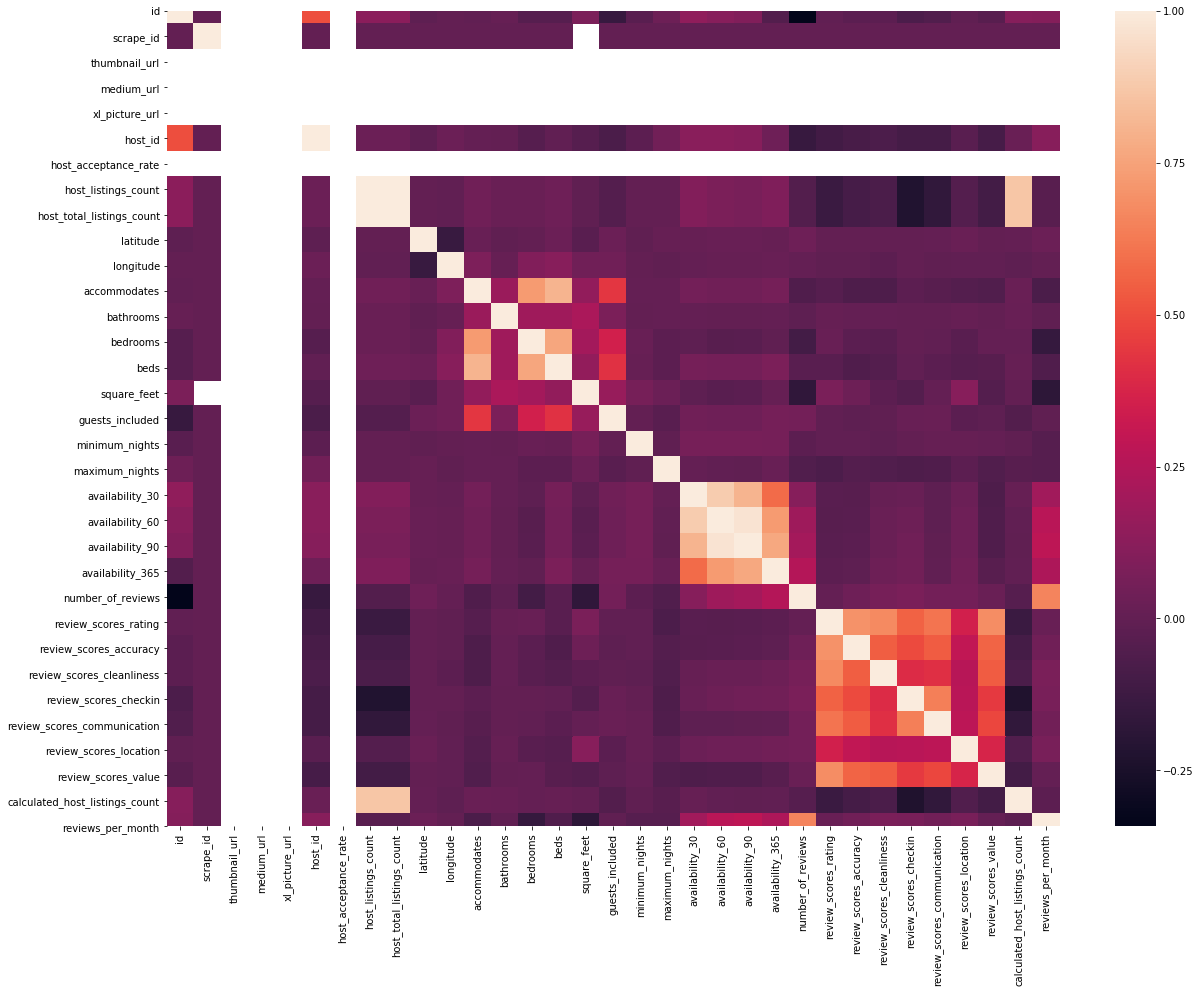

In [199]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_listings_details.corr())

In order for me to find any type of correlation between unit features and the price of each unit I will need to concatenate the both df_listings and df_listings_details together. From here I can choose the feature that coorelate best to price. 